In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
import shutil

# Step 1: Upload the files
uploaded = files.upload()

# Step 3: Specify the target directory in Google Drive
target_directory = '/content/drive/MyDrive/Datasets/COVID_Datasets'
os.makedirs(target_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Step 4: Move each uploaded file to the target directory
for filename in uploaded.keys():
    shutil.move(filename, os.path.join(target_directory, filename))


Saving CT_COVID.zip to CT_COVID.zip
Saving CT_NonCOVID.zip to CT_NonCOVID.zip


In [13]:

import zipfile

# Step 2: Define the file path and the directory to unzip to
zip_file_path_covid = '/content/drive/MyDrive/Datasets/COVID_Datasets/CT_COVID.zip'
zip_file_path_noncovid = '/content/drive/MyDrive/Datasets/COVID_Datasets/CT_NonCOVID.zip'
unzip_dir_covid = '/content/drive/MyDrive/Datasets/COVID_Datasets/CT_COVID'
unzip_dir_noncovid = '/content/drive/MyDrive/Datasets/COVID_Datasets/CT_NonCOVID'

# Step 3: Create the directory if it doesn't exist
os.makedirs(unzip_dir_covid, exist_ok=True)
os.makedirs(unzip_dir_noncovid, exist_ok=True)

# Step 4: Unzip the file
with zipfile.ZipFile(zip_file_path_covid, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir_covid)

with zipfile.ZipFile(zip_file_path_noncovid, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir_noncovid)

print("Unzipping completed!")


Unzipping completed!


In [3]:
! pip install torchmetrics
! pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 41.0 MB/s eta 0:00:00


In [6]:
import pytorch_lightning as pl
print(pl.__version__)


2.4.0


In [5]:
!pip install --upgrade pytorch-lightning


In [4]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=1cefd611c90bd017856e8d6c8b678233668582b17d09104bec249af496b29fd0
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torchmetrics
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import DataLoader ,Dataset ,random_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy
from PIL import Image
from torch.utils.data import Dataset, Dataset, DataLoader, random_split ,Subset
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
from torchsummary import summary
import torch.nn.functional as F
import pathlib
from torch import optim
import torchvision.models as models
from torchviz import make_dot
from torchvision import models
from torchviz import make_dot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random


In [6]:
torch.manual_seed(42)

In [7]:

# Define the path to the directories
covid_dir = '/content/drive/MyDrive/Datasets/COVID_Datasets/CT_COVID'
noncovid_dir = '/content/drive/MyDrive/Datasets/COVID_Datasets/CT_NonCOVID'

# Function to create a DataFrame with image paths and labels
def create_dataframe(directory):
    data = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):  # Check if it's a directory
            for file in os.listdir(label_dir):
                if file.endswith(('.png', '.jpg', '.jpeg')):  # Include image file types
                    data.append({'file_path': os.path.join(label_dir, file), 'label': label})
    return pd.DataFrame(data)

# Create DataFrames for train and test datasets
covid_df = create_dataframe(covid_dir)
noncovid_df = create_dataframe(noncovid_dir)

# Print out the first few rows of the DataFrames
print("Train DataFrame:")
print(covid_df.head())
print("\nTest DataFrame:")
print(noncovid_df.head())


Train DataFrame:
                                           file_path     label
0  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_COVID
1  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_COVID
2  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_COVID
3  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_COVID
4  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_COVID

Test DataFrame:
                                           file_path        label
0  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID
1  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID
2  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID
3  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID
4  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID


In [8]:
def show_random_samples_from_dataset(dataset, num_samples=5):
    # Randomly sample 'num_samples' rows from the dataset
    samples = dataset.sample(n=num_samples)

    # Set up the plot
    plt.figure(figsize=(15, 10))

    for i, (index, row) in enumerate(samples.iterrows()):
        # Load the image
        img = Image.open(row['file_path'])

        # If you need to convert the image to a tensor (if using PyTorch)
        transform = transforms.ToTensor()
        img_tensor = transform(img)

        # Display the image
        plt.subplot(1, num_samples, i + 1)  # Create a subplot for each sample
        plt.imshow(img_tensor.permute(1, 2, 0))  # Convert to HWC format for displaying
        plt.title(row['label'])  # Add the label as title
        plt.axis('off')  # Hide axis

    plt.tight_layout()  # Adjust layout
    plt.show()



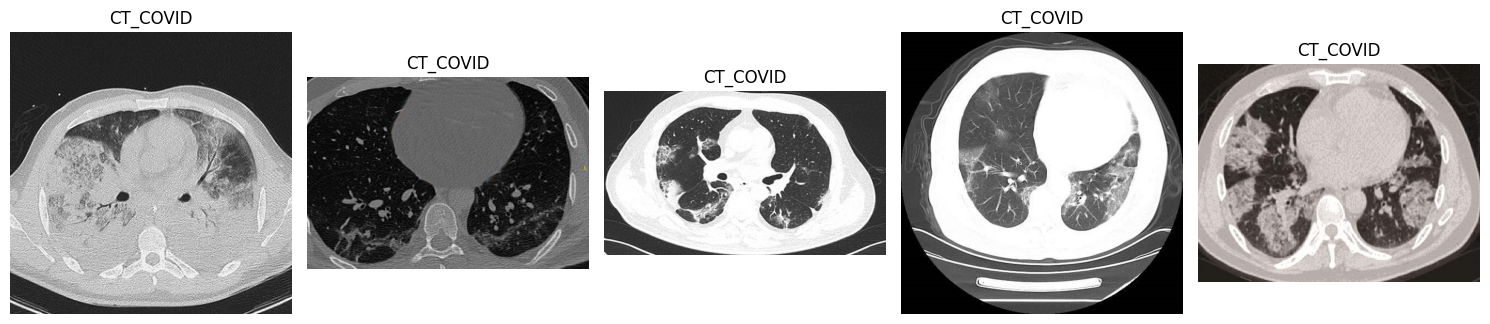

In [9]:
show_random_samples_from_dataset(covid_df)

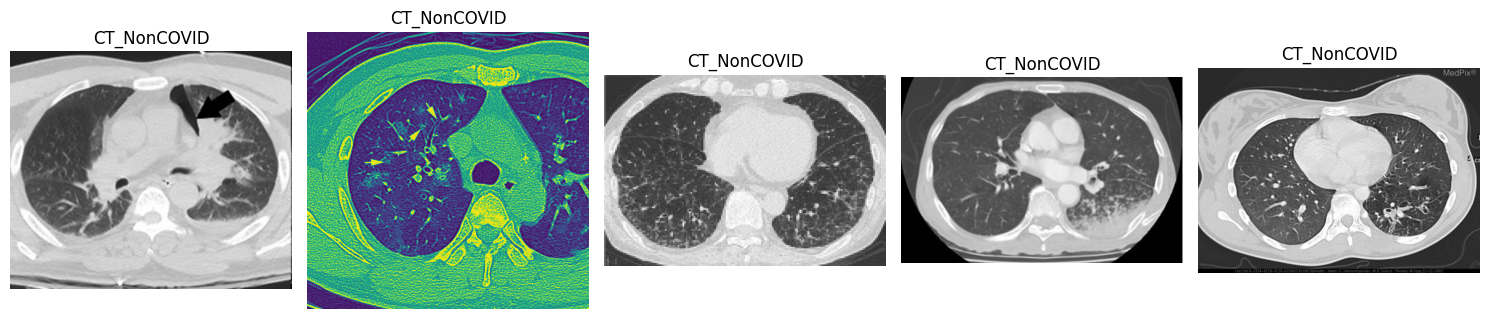

In [10]:
show_random_samples_from_dataset(noncovid_df)

In [28]:
covid_df.shape

(349, 2)

In [31]:
noncovid_df.shape

(397, 2)

In [12]:
covid_df.describe()

,file_path,label
count,349,349
unique,349,1
top,/content/drive/MyDrive/Datasets/COVID_Datasets...,CT_COVID
freq,1,349


In [13]:
noncovid_df.describe()

,file_path,label
count,397,397
unique,397,1
top,/content/drive/MyDrive/Datasets/COVID_Datasets...,CT_NonCOVID
freq,1,397


#merge classes and split dataframe into train ,val test

In [14]:

# Merge the DataFrames
combined_df = pd.concat([covid_df, noncovid_df], ignore_index=True)

# Split the combined DataFrame into train, validation, and test sets
train_df, temp_df = train_test_split(combined_df, test_size=0.3, random_state=42, stratify=combined_df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Print out the sizes of the resulting DataFrames
print("Training DataFrame Size:", train_df.shape)
print("Validation DataFrame Size:", val_df.shape)
print("Test DataFrame Size:", test_df.shape)

# Optionally, print out the first few rows of each DataFrame
print("\nTraining DataFrame:")
print(train_df.head())
print("\nValidation DataFrame:")
print(val_df.head())
print("\nTest DataFrame:")
print(test_df.head())


Training DataFrame Size: (522, 2)
Validation DataFrame Size: (112, 2)
Test DataFrame Size: (112, 2)

Training DataFrame:
                                             file_path        label
692  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID
83   /content/drive/MyDrive/Datasets/COVID_Datasets...     CT_COVID
278  /content/drive/MyDrive/Datasets/COVID_Datasets...     CT_COVID
573  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID
555  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID

Validation DataFrame:
                                             file_path        label
149  /content/drive/MyDrive/Datasets/COVID_Datasets...     CT_COVID
226  /content/drive/MyDrive/Datasets/COVID_Datasets...     CT_COVID
191  /content/drive/MyDrive/Datasets/COVID_Datasets...     CT_COVID
511  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID
638  /content/drive/MyDrive/Datasets/COVID_Datasets...  CT_NonCOVID

Test DataFrame:
                       

In [15]:
train_label_counts = train_df['label'].value_counts()
val_label_counts = val_df['label'].value_counts()
test_label_counts = test_df['label'].value_counts()

In [16]:
train_label_counts

,count
label,
CT_NonCOVID,278
CT_COVID,244


In [18]:
val_label_counts

,count
label,
CT_NonCOVID,60
CT_COVID,52


In [17]:
test_label_counts

,count
label,
CT_NonCOVID,59
CT_COVID,53


In [19]:
train_df_copy = copy.deepcopy(train_df)
val_df_copy = copy.deepcopy(val_df)
test_df_copy = copy.deepcopy(test_df)

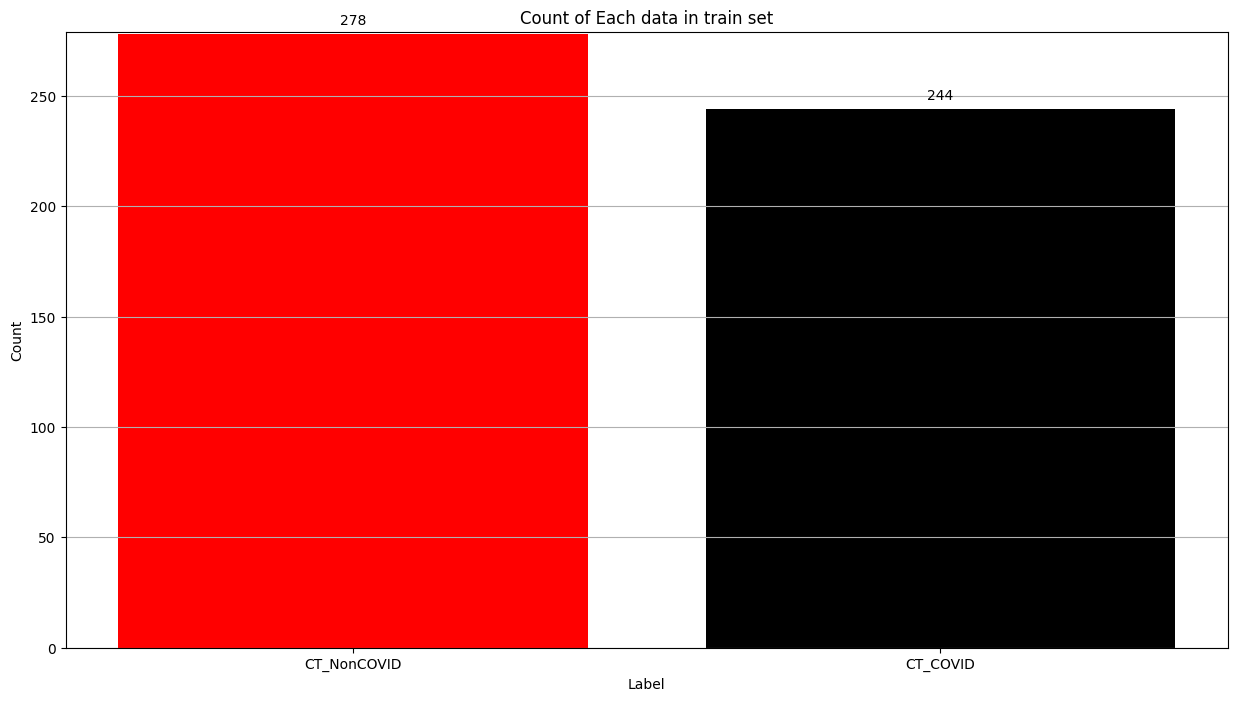

In [22]:
# Define a color for each label
colors = {
    'CT_NonCOVID': 'red',
    'CT_COVID': 'black'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(train_label_counts.index, train_label_counts.values, color=[colors[label] for label in train_label_counts.index])

# Set y-axis limit
plt.ylim(0, train_label_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in train set')
plt.grid(axis='y')
plt.show()


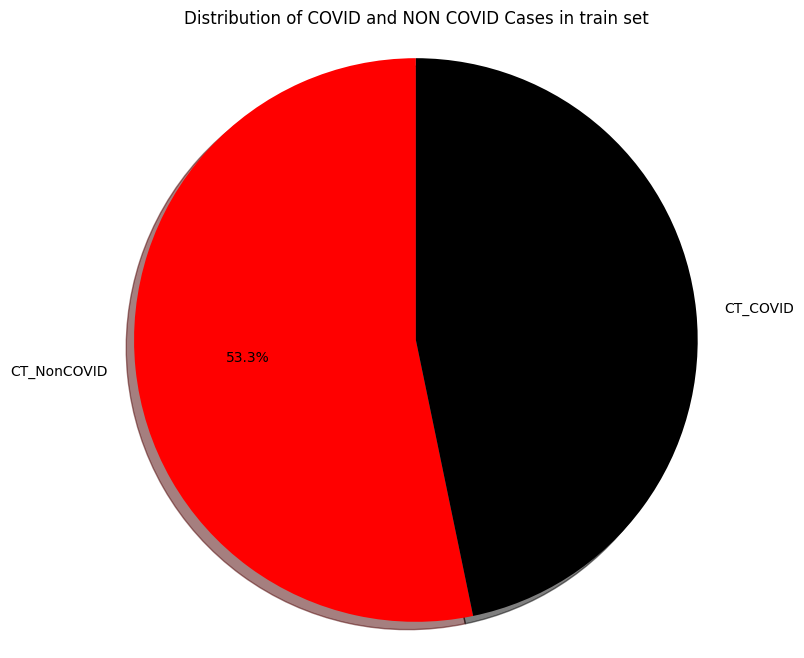

In [26]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(train_label_counts,
        labels=train_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['red', 'black'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of COVID and NON COVID Cases in train set')
plt.show()


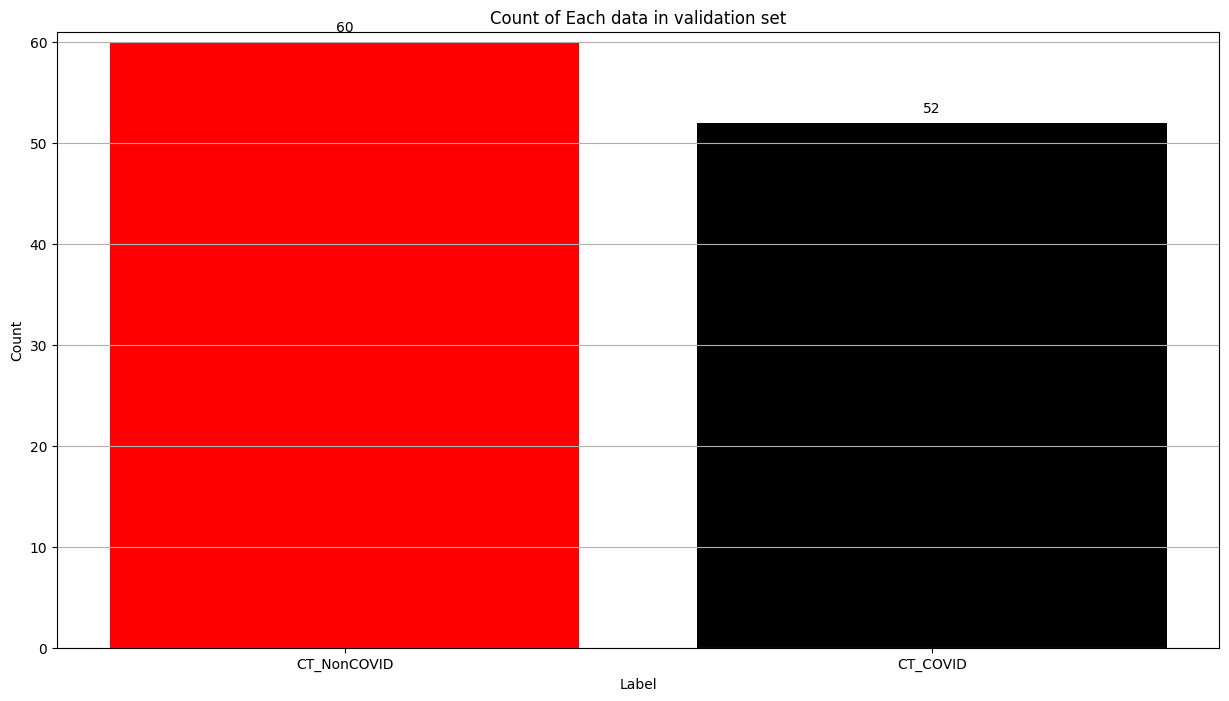

In [23]:
# Define a color for each label
colors = {
    'CT_NonCOVID': 'red',
    'CT_COVID': 'black'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(val_label_counts.index, val_label_counts.values, color=[colors[label] for label in val_label_counts.index])

# Set y-axis limit
plt.ylim(0, val_label_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in validation set')
plt.grid(axis='y')
plt.show()


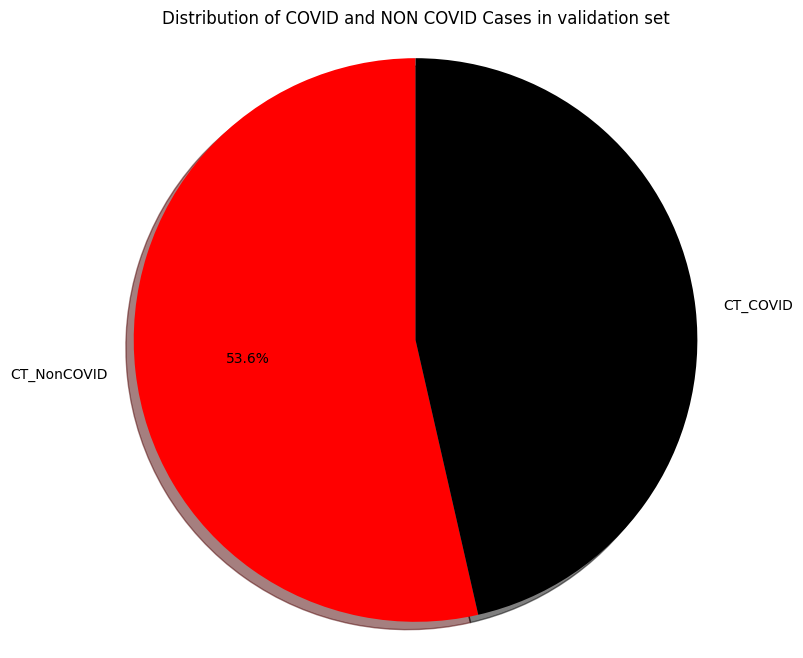

In [27]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(val_label_counts,
        labels=val_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['red', 'black'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of COVID and NON COVID Cases in validation set')
plt.show()


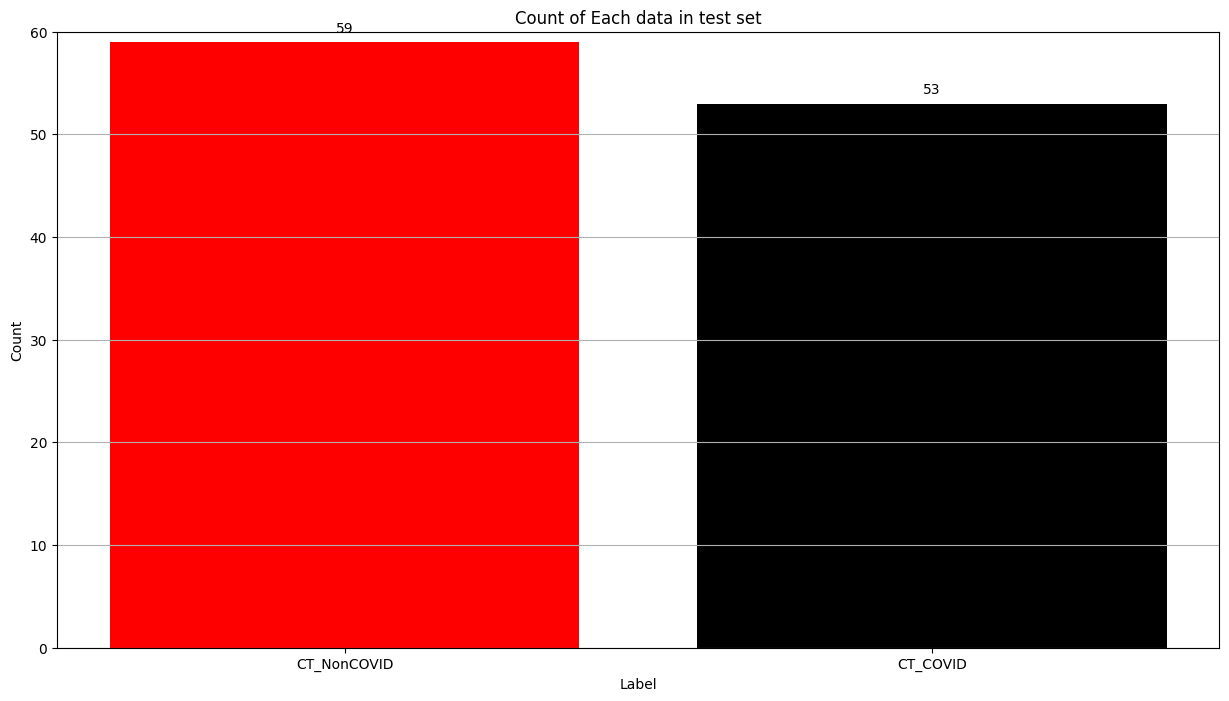

In [24]:
# Define a color for each label
colors = {
    'CT_NonCOVID': 'red',
    'CT_COVID': 'black'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(test_label_counts.index, test_label_counts.values, color=[colors[label] for label in test_label_counts.index])

# Set y-axis limit
plt.ylim(0, test_label_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in test set')
plt.grid(axis='y')
plt.show()


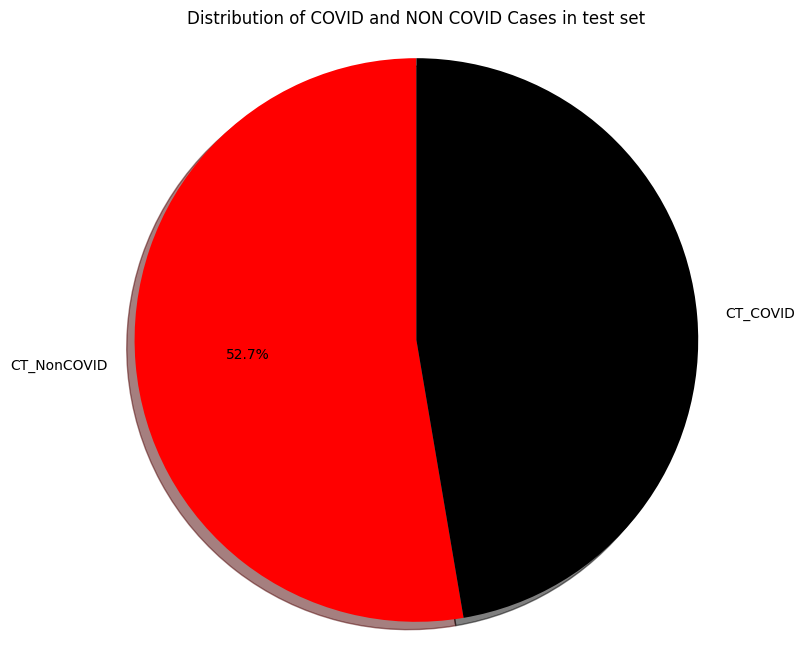

In [28]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(test_label_counts,
        labels=test_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['red', 'black'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of COVID and NON COVID Cases in test set')
plt.show()


In [29]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df[['file_path']],
train_df['label'])
train_df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
train_df_resampled['label'] = y_resampled
print("\nClass distribution after oversampling:")
print(train_df_resampled['label'].value_counts())


Class distribution after oversampling:
label
CT_NonCOVID    278
CT_COVID       278
Name: count, dtype: int64


In [31]:
train_df_resampled_label_counts = train_df_resampled['label'].value_counts()

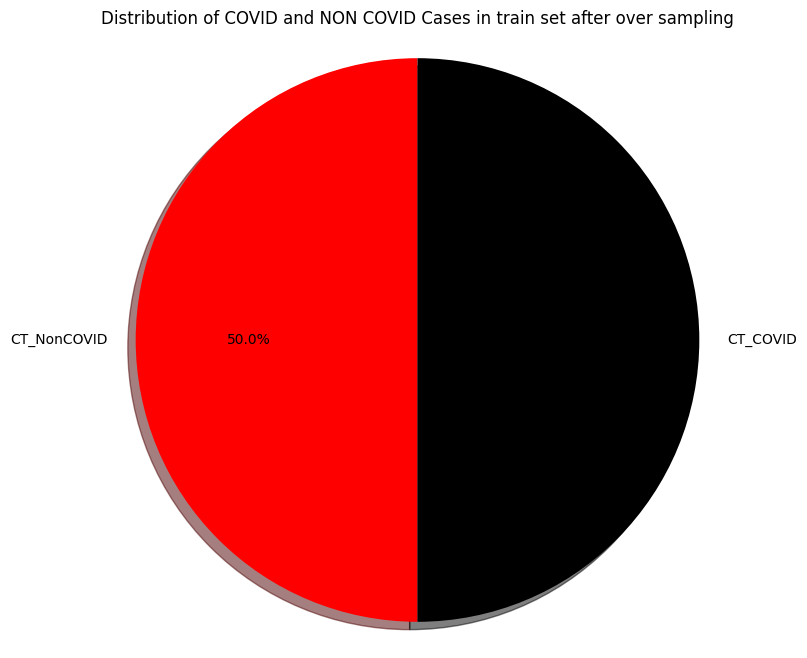

In [32]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(train_df_resampled_label_counts,
        labels=train_df_resampled_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['red', 'black'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of COVID and NON COVID Cases in train set after over sampling')
plt.show()


#transformation data

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Step 2: Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
    transforms.RandomVerticalFlip(p=0.5),  # Randomly flip images vertically
    transforms.RandomRotation(degrees=30),  # Randomly rotate images
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Randomly change brightness, contrast, etc.
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.classes = dataframe['label'].unique()  # Store unique class names
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(self.classes)  # Fit the label encoder

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]  # Get image path
        label = self.dataframe.iloc[idx, 1]  # Get label

        # Check if the path is a file
        if not os.path.isfile(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

        img = Image.open(img_path).convert('RGB')  # Open image and convert to RGB

        if self.transform:
            img = self.transform(img)  # Apply transformations

        # Convert label to integer and then to tensor
        label = self.label_encoder.transform([label])[0]  # Transform the label to an integer
        label = torch.tensor(label, dtype=torch.long)  # Convert to tensor

        return img, label

# Create the dataset from the resampled training DataFrame
train_dataset = CustomDataset(train_df_resampled, transform=transform)
val_dataset = CustomDataset(val_df, transform=transform)
test_dataset = CustomDataset(test_df, transform=transform)


# Step 9: Create data loaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

# Optional: Print the sizes of the datasets
print(f"Training dataset size: {len(train_loader.dataset)}")
print(f"Validation dataset size: {len(val_loader.dataset)}")
print(f"Test dataset size: {len(test_loader.dataset)}")


Training dataset size: 556
Validation dataset size: 112
Test dataset size: 112


tensor(1)


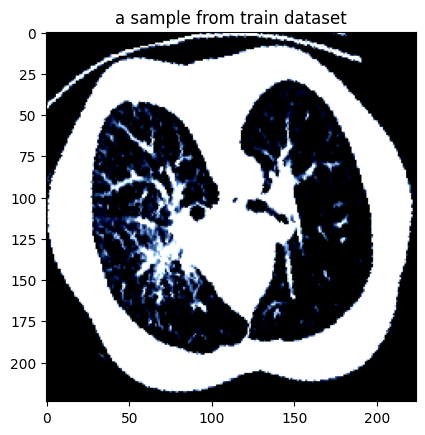

In [39]:
img, label = train_dataset[42]
plt.imshow(img.permute(1,2,0)) #convert into bgr format
plt.title('a sample from train dataset')
print(label)

tensor(1)


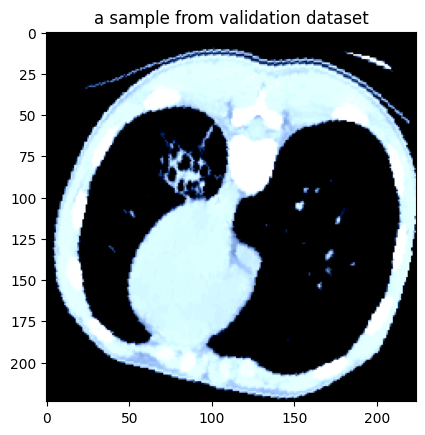

In [37]:
img, label = val_dataset[42]
plt.imshow(img.permute(1,2,0)) #convert into bgr format
plt.title('a sample from validation dataset')
print(label)

tensor(1)


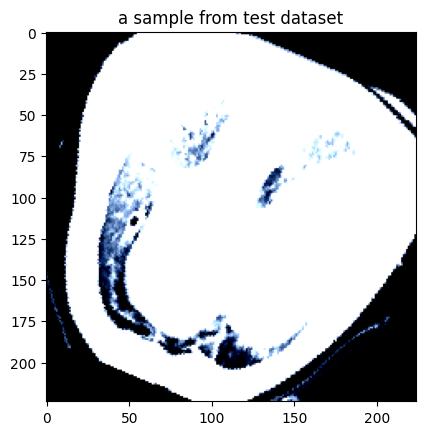

In [40]:
img, label = test_dataset[42]
plt.imshow(img.permute(1,2,0)) #convert into bgr format
plt.title('a sample from test dataset')
print(label)

#Modeling

In [166]:
import torch
import torch.nn as nn
from torchsummary import summary

class ComplexCNNModel(nn.Module):
    def __init__(self):
        super(ComplexCNNModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)

        self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(512)

        # Max pooling layer
        self.maxpool = nn.MaxPool2d(kernel_size=2)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.1)  # Lower dropout rate

        # Activation Function
        self.relu = nn.ReLU()

        # Calculate input size for fc1 after the convolutional layers
        # Input image size: (3, 224, 224)
        # After conv1 + pool: (16, 112, 112)
        # After conv2 + pool: (32, 56, 56)
        # After conv3 + pool: (64, 28, 28)
        # After conv4 + pool: (128, 14, 14)
        # After conv5 + pool: (256, 7, 7)
        # After conv6 + pool: (512, 3, 3)
        self.fc1_input_size = 512 * 3 * 3  # Corrected input size for fc1
        self.fc1 = nn.Linear(self.fc1_input_size, 64)  # Fully connected layer
        self.fc2 = nn.Linear(64, 1)  # Binary classification output

    def forward(self, x):
        # Convolutional layers with max pooling, batch normalization, and dropout
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.relu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)

        x = self.relu(self.bn3(self.conv3(x)))
        x = self.maxpool(x)

        x = self.relu(self.bn4(self.conv4(x)))
        x = self.maxpool(x)

        x = self.relu(self.bn5(self.conv5(x)))
        x = self.maxpool(x)

        x = self.relu(self.bn6(self.conv6(x)))
        x = self.maxpool(x)

        # Flatten
        out = x.view(x.size(0), -1)

        # Fully connected layers with dropout
        out = self.relu(self.fc1(out))
        out = self.dropout(out)  # Apply dropout
        out = self.fc2(out)  # Final output layer

        return out



In [167]:
CNN_model = ComplexCNNModel()

In [148]:
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    # Get the current device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device: {current_device}")

    # Get the number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")


CUDA is available!
Current CUDA device: 0
Number of available GPUs: 1
GPU 0: Tesla T4


In [172]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
CNN_model.to(device)

# Create a dummy input tensor on the same device
input_tensor = torch.randn(1, 3, 224, 224).to(device)

# Print model summary
summary(CNN_model, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
              ReLU-3         [-1, 16, 224, 224]               0
         MaxPool2d-4         [-1, 16, 112, 112]               0
            Conv2d-5         [-1, 32, 112, 112]           4,640
       BatchNorm2d-6         [-1, 32, 112, 112]              64
              ReLU-7         [-1, 32, 112, 112]               0
         MaxPool2d-8           [-1, 32, 56, 56]               0
            Conv2d-9           [-1, 64, 56, 56]          18,496
      BatchNorm2d-10           [-1, 64, 56, 56]             128
             ReLU-11           [-1, 64, 56, 56]               0
        MaxPool2d-12           [-1, 64, 28, 28]               0
           Conv2d-13          [-1, 128, 28, 28]          73,856
      BatchNorm2d-14          [-1, 128,

In [150]:
# Create a dummy input
x = torch.randn(1, 3, 224, 224).to(device)  # Batch size of 1

# Get the output
y = CNN_model(x)

# Visualize the model
dot = make_dot(y, params=dict(list(CNN_model.named_parameters())))
dot.render("cnn_architecture1 for Covid", format="png")  # Save as PNG


'cnn_architecture1 for Covid.png'

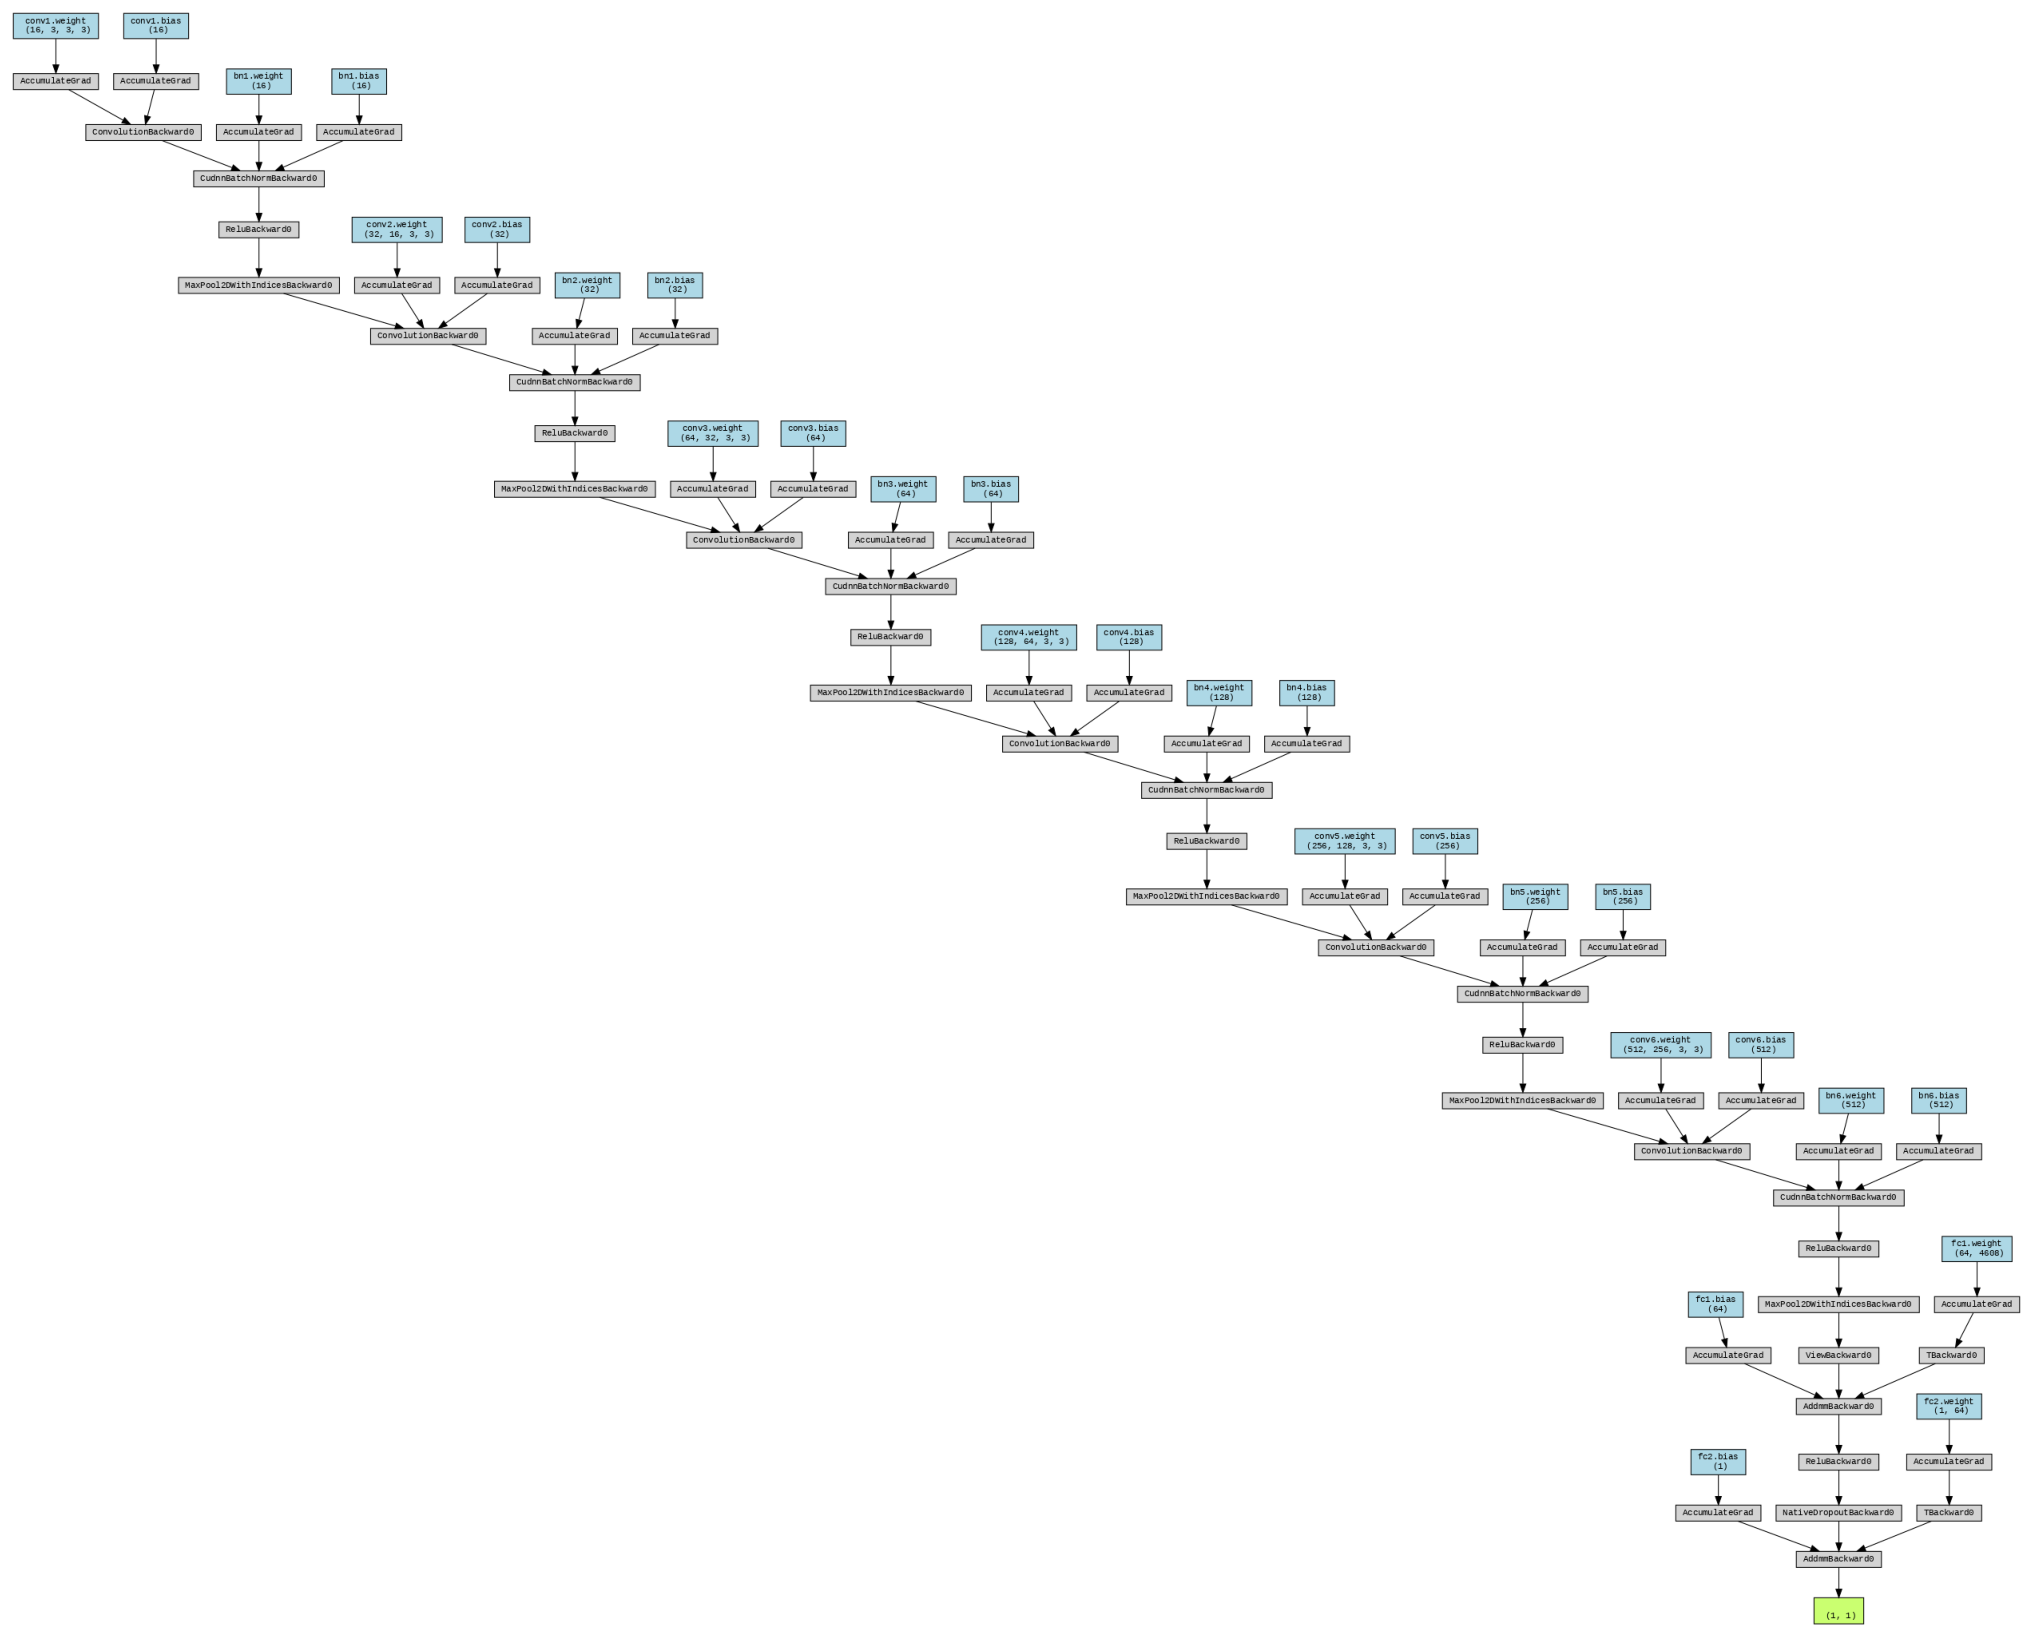

In [136]:
# Display the image using matplotlib
img = mpimg.imread("/content/cnn_architecture1 for Covid.png")
plt.figure(figsize=(35, 21))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [137]:
pip install visualtorch


In [ ]:
# # Visualize the model
# from visualtorch import draw
# draw(CNN_model, input_size=(3, 224, 224))

In [168]:
num_epoch = 20
loss_fn = nn.BCEWithLogitsLoss()
lr=0.001
optimizer = torch.optim.Adam(CNN_model.parameters(), lr=0.006,weight_decay=1e-4)  # L2 regularization =  weight_decay=1e-4
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=4, verbose=True)

In [169]:
# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=7, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0  # Reset counter if validation loss improves
        else:
            self.counter += 1  # Increment counter if no improvement
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print("Early stopping triggered")

# Initialize early stopping
early_stopping = EarlyStopping(patience=5, verbose=True)


In [170]:
train_loss_list=[]
val_loss_list=[]
acc_list=[]

best_val_loss = float('inf')  # Initialize the best validation loss
best_model_wts = None  # Variable to hold the best model weights

In [173]:
for epoch in range(num_epoch):
    train_loss = 0
    val_loss = 0
    total = 0
    correct = 0

    # Training phase
    CNN_model.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device).unsqueeze(1).float()  # Ensure labels are float

        # Forward pass
        outputs = CNN_model(images)
        loss = loss_fn(outputs, labels)
        train_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Validation phase
    CNN_model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device).unsqueeze(1).float()  # Ensure labels are float

            outputs = CNN_model(images)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()

            # Get probabilities and predictions
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid for evaluation
            predicted = (probabilities > 0.5).float()  # Thresholding at 0.5

            total += len(labels)
            correct += (predicted == labels).sum().item()

    # Step the scheduler based on validation loss
    scheduler.step(val_loss)

    # Calculate performance of training model
    accuracy = 100 * correct / float(total)
    train_loss_list.append(train_loss / len(train_loader))
    val_loss_list.append(val_loss / len(val_loader))
    acc_list.append(accuracy)

    print('-' * 100)
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Accuracy: {:.2f}%'.format(
        epoch + 1, num_epoch, train_loss / len(train_loader), val_loss / len(val_loader), accuracy))

    # Check if the current validation loss is the best we've seen so far
    avg_val_loss = val_loss / len(val_loader)
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_wts = CNN_model.state_dict()
        print("Best model weights saved.")

    # Check for early stopping
    early_stopping(avg_val_loss)
    if early_stopping.early_stop:
        print("Early stopping at epoch:", epoch + 1)
        break

# Save the best model weights to a file
if best_model_wts is not None:
    torch.save(best_model_wts, 'best_model_weights.pth')
    print("Best model weights saved to 'best_model_weights.pth'.")

----------------------------------------------------------------------------------------------------
Epoch [1/20], Train Loss: 1.3946, Val Loss: 3.6555, Accuracy: 49.11%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [2/20], Train Loss: 0.6992, Val Loss: 0.6734, Accuracy: 58.04%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [3/20], Train Loss: 0.6678, Val Loss: 0.6646, Accuracy: 65.18%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [4/20], Train Loss: 0.6634, Val Loss: 0.7880, Accuracy: 60.71%
----------------------------------------------------------------------------------------------------
Epoch [5/20], Train Loss: 0.6387, Val Loss: 0.7036, Accuracy: 57.14%
------------------------------------------------------------------------

In [174]:
print(f'Number of epochs: {num_epoch}')
print(f'Train Loss List Length: {len(train_loss_list)}')
print(f'Validation Loss List Length: {len(val_loss_list)}')
print(f'Accuracy List Length: {len(acc_list)}')


Number of epochs: 20
Train Loss List Length: 20
Validation Loss List Length: 20
Accuracy List Length: 20


In [175]:
num_epoch = len(train_loss_list)

#visualize performance of training phase

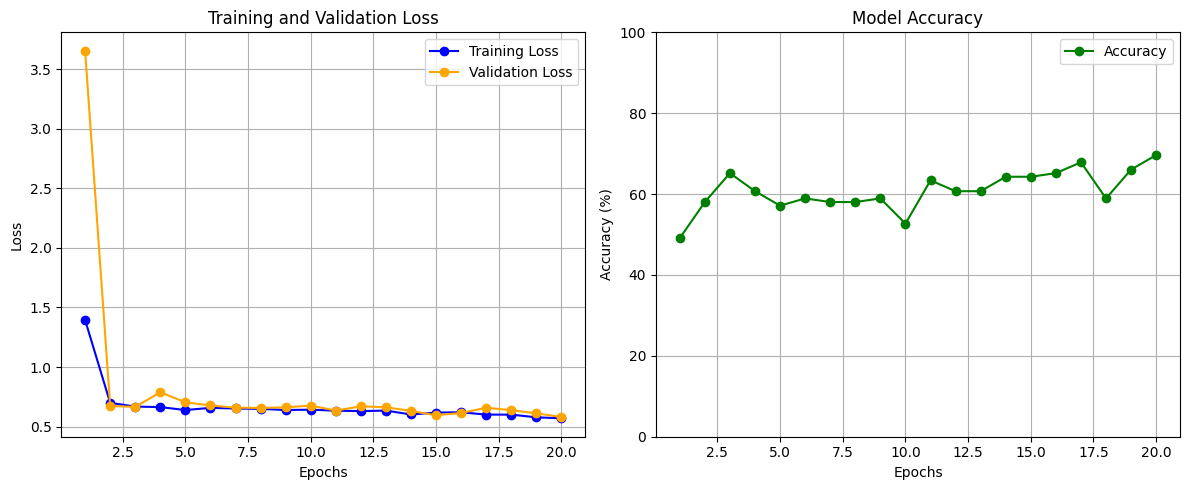

In [176]:
# Assuming train_loss_list, val_loss_list, and acc_list are already populated
epochs = range(1, num_epoch + 1)

# Plotting Loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_list, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_loss_list, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_list, label='Accuracy', color='green', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for accuracy
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()


#Evaluation

In [88]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

Test Loss: 0.6244, Test Accuracy: 69.64%
Precision: 0.78, Recall: 0.59, F1 Score: 0.67, ROC AUC: 0.70


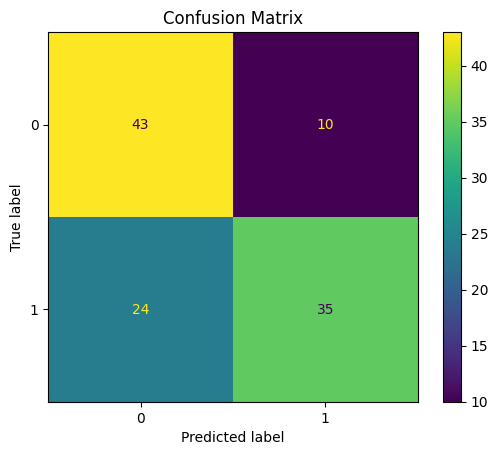

In [177]:
# Test phase
CNN_model.eval()  # Set model to evaluation mode

# Initialize lists to store metrics
test_loss = 0
total = 0
correct = 0
all_test_labels = []
all_test_predictions = []
test_loss_list = []  # List to store all test losses
test_accuracy_list = []  # List to store test accuracy for each epoch

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device).unsqueeze(1).float()  # Ensure labels are float

        # Forward pass
        outputs = CNN_model(images)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()

        # Append individual loss to the list for visualization
        test_loss_list.append(loss.item())  # Store each loss

        # Collecting true and predicted labels
        probabilities = torch.sigmoid(outputs)  # Apply sigmoid for evaluation
        predicted = (probabilities > 0.5).float()  # Thresholding at 0.5
        total += len(labels)
        correct += (predicted == labels).sum().item()

        # Store labels and predictions for metrics
        all_test_labels.extend(labels.cpu().numpy())  # Collect true labels
        all_test_predictions.extend(predicted.cpu().numpy())  # Collect predicted labels

# Calculate average test loss and accuracy
test_loss_avg = test_loss / len(test_loader)
test_accuracy = 100 * correct / total

# Append the accuracy for the current epoch
test_accuracy_list.append(test_accuracy)

# Calculate additional metrics
precision = precision_score(all_test_labels, all_test_predictions)
recall = recall_score(all_test_labels, all_test_predictions)
f1 = f1_score(all_test_labels, all_test_predictions)
roc_auc = roc_auc_score(all_test_labels, all_test_predictions)

# Print test results
print(f'Test Loss: {test_loss_avg:.4f}, Test Accuracy: {test_accuracy:.2f}%')
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}')

# Confusion Matrix
cm = confusion_matrix(all_test_labels, all_test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


#visualize predictions on test set

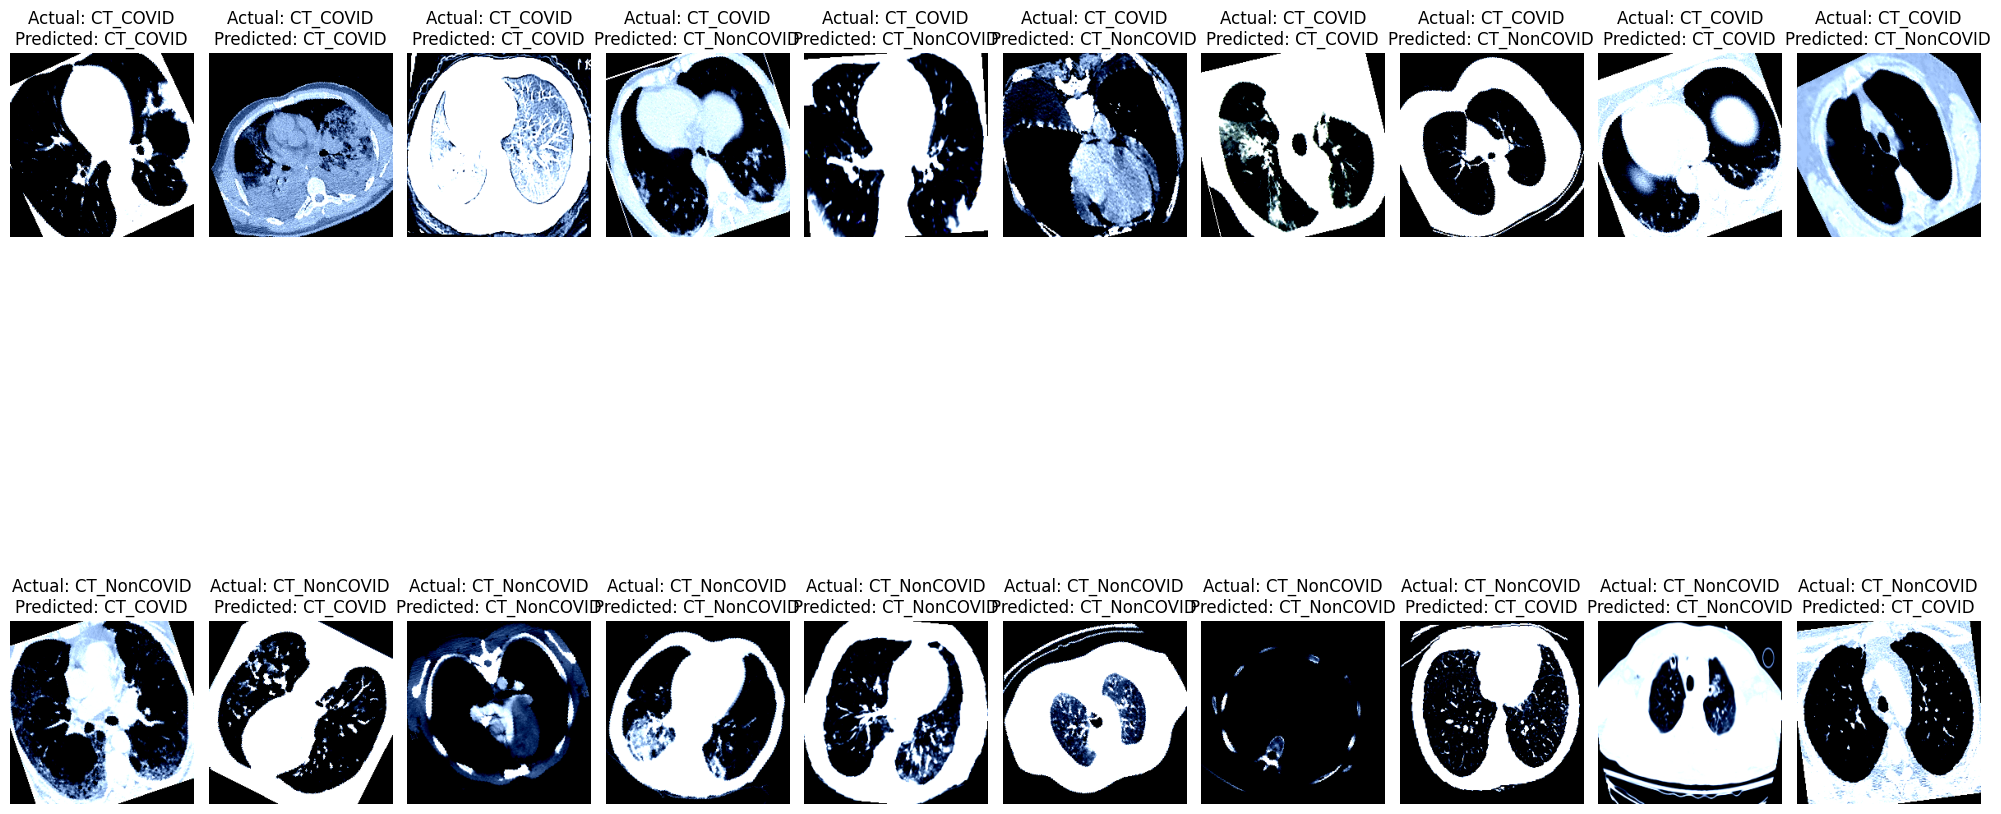

In [178]:
import random

def visualize_predictions1(model, test_set, num_samples=10, class_names=None):
    # Set model to evaluation mode
    model.eval()

    # If class_names are not provided, get them from the dataset
    if class_names is None:
        class_names = test_df['label'].unique()

    # Create a figure to hold the plots
    plt.figure(figsize=(20, 15))

    # Initialize a list to keep track of samples chosen
    chosen_indices = []

    # Loop through each class
    for class_idx in range(len(class_names)):
        # Get all indices of the current class
        class_indices = [i for i, (_, label) in enumerate(test_set) if label == class_idx]

        # Randomly select num_samples indices from the class indices
        selected_indices = random.sample(class_indices, num_samples)
        chosen_indices.extend(selected_indices)

        # Loop through the selected indices and plot the images
        for i, idx in enumerate(selected_indices):
            img, label = test_set[idx]
            img = img.unsqueeze(0).to(device)  # Add batch dimension and move to device

            # Generate a random prediction
            random_pred = random.choice(range(len(class_names)))

            # Plot the image
            plt.subplot(len(class_names), num_samples, class_idx * num_samples + i + 1)
            plt.imshow(img.cpu().squeeze(0).permute(1, 2, 0))  # Convert to HWC format
            plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[random_pred]}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming 'test_dataset' is a Subset of a larger dataset
# You can call the function like this:
visualize_predictions1(CNN_model, test_dataset)


#pre trained model

For brain tumor classification using transfer learning, leveraging pre-trained models can significantly enhance performance due to their ability to extract relevant features from images. Here are five of the best architectures commonly used for medical image classification, along with some insights on their effectiveness:

### 1. **ResNet (Residual Networks)**
- **Description**: ResNet introduces skip connections that allow gradients to flow through the network without vanishing. This architecture is particularly effective for very deep networks.
- **Benefits**: It has shown excellent performance in various image classification tasks, including medical images, due to its ability to learn complex features.
- **Transfer Learning**: You can use pre-trained weights on ImageNet and fine-tune them on your specific dataset.

### 2. **DenseNet (Densely Connected Convolutional Networks)**
- **Description**: DenseNet connects each layer to every other layer in a feed-forward fashion. This means that the feature maps from all previous layers are used as inputs to the subsequent layers.
- **Benefits**: It reduces the number of parameters and improves gradient flow, making it suitable for medical images where data may be limited.
- **Transfer Learning**: Like ResNet, you can utilize pre-trained weights and adapt the model to your dataset.

### 3. **EfficientNet**
- **Description**: EfficientNet scales the model size (depth, width, resolution) in a balanced way. It achieves state-of-the-art accuracy with fewer parameters compared to other architectures.
- **Benefits**: EfficientNet models are efficient in terms of computation and memory, making them ideal for deployment in resource-constrained environments.
- **Transfer Learning**: Pre-trained versions are available, which can be fine-tuned on medical datasets.

### 4. **VGG (Visual Geometry Group)**
- **Description**: VGG is known for its simplicity and depth. It uses small convolutional filters (3x3) stacked on top of each other.
- **Benefits**: While it has a large number of parameters, it is effective in capturing spatial hierarchies in images.
- **Transfer Learning**: VGG models pre-trained on ImageNet can be fine-tuned for specific tasks like brain tumor classification.

### 5. **Inception (GoogLeNet)**
- **Description**: Inception uses multiple filter sizes in parallel (1x1, 3x3, 5x5) to capture different features at various scales.
- **Benefits**: This architecture is efficient in terms of computation and has shown strong performance in image classification tasks.
- **Transfer Learning**: The pre-trained models can be adapted to new datasets, making them suitable for medical image classification.

### Recommendations for Implementation
- **Data Augmentation**: Since medical datasets can be limited, applying data augmentation techniques (rotation, flipping, scaling, etc.) can help improve model generalization.
- **Fine-tuning**: Start by freezing the initial layers of the pre-trained model and only train the last few layers. Gradually unfreeze layers for fine-tuning as needed.
- **Evaluation Metrics**: Use appropriate metrics such as accuracy, precision, recall, and F1-score to evaluate model performance, especially in imbalanced datasets.

### Conclusion
Consider experimenting with these architectures and see which one performs best on your specific dataset. EfficientNet and DenseNet are particularly recommended for their balance of performance and efficiency, especially in medical image classification tasks.

In [184]:
# Define the number of classes
num_classes = 2

# Define the models
models_dict = {
    'resnet': models.resnet50(pretrained=True),# 25 million parameters
    'densenet': models.densenet121(pretrained=True),#8 million parameters
    'vgg': models.vgg16(pretrained=True), #138 million parameters
#    'inception': models.inception_v3(pretrained=True, aux_logits=True),  # 24 million parameters . Set aux_logits to True
    'efficientnet': models.efficientnet_b0(pretrained=True) #5 million parameters
}

In [185]:
def Modify_final_layer(model, num_classes):
    if isinstance(model, models.ResNet):
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif isinstance(model, models.DenseNet):
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif isinstance(model, models.VGG):
        # Access the last layer in the classifier
        last_layer = model.classifier[-1]
        if isinstance(last_layer, nn.Linear):
            model.classifier[-1] = nn.Linear(last_layer.in_features, num_classes)
        else:
            raise Exception("Final layer is not a Linear layer in VGG!")
    # elif isinstance(model, models.Inception3):
    #     model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)  # Modify auxiliary classifier
    #     model.fc = nn.Linear(model.fc.in_features, num_classes)  # Modify main classifier
    elif isinstance(model, models.EfficientNet):
        # EfficientNet's classifier is a Sequential; access the last layer
        if isinstance(model.classifier, nn.Sequential):
            last_layer = model.classifier[-1]
            if isinstance(last_layer, nn.Linear):
                model.classifier[-1] = nn.Linear(last_layer.in_features, num_classes)
            else:
                raise Exception("Final layer is not a Linear layer in EfficientNet!")
        else:
            raise Exception("Classifier is not a Sequential in EfficientNet!")
    else:
        raise Exception(f"Couldn't find final classification layer for {type(model).__name__}!")


In [186]:
for name, model in models_dict.items():
    print(f"Model: {name}")
    print(model)  # Print the model structure
    Modify_final_layer(model, num_classes)


Model: resnet
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1

#visualize pretrained model arcitecture

In [ ]:
# Create a directory to save the images
output_dir = 'model_visualizations'
os.makedirs(output_dir, exist_ok=True)

# Function to visualize a model
def visualize_model(model, model_name):
    # Create a dummy input tensor with the appropriate shape
    dummy_input = torch.randn(1, 3, 224, 224)  # Batch size of 1, 3 channels, 224x224 image
    # Generate the graph
    dot = make_dot(model(dummy_input), params=dict(list(model.named_parameters())))
    # Save the graph as a PNG file
    dot.render(os.path.join(output_dir, model_name), format='png', cleanup=True)

# Visualize each model and save the images
for name, model in models_dict.items():
    visualize_model(model, name)

# Plot the saved images using matplotlib
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

# Load and display each image
for i, model_name in enumerate(models_dict.keys()):
    img_path = os.path.join(output_dir, f"{model_name}.png")
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')  # Hide axes
    axs[i].set_title(model_name)

plt.tight_layout()
plt.show()


In [187]:
# Training function
def train_model(model, train_loader, val_loader, num_epochs=5):
    model = model.to(device)  # Move model to device (GPU or CPU)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate average loss for the epoch
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

        # Validation step
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():  # Disable gradient calculation
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                loss = criterion(val_outputs, val_labels)
                val_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(val_outputs.data, 1)
                total += val_labels.size(0)
                correct += (predicted == val_labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train each model
for name, model in models_dict.items():
    print(f"Training {name} model...")
    print(f'-'*100)
    train_model(model, train_loader, val_loader)


Training resnet model...
----------------------------------------------------------------------------------------------------
Epoch [1/5], Loss: 0.8040
Validation Loss: 50.0773, Accuracy: 53.57%
Epoch [2/5], Loss: 0.6226
Validation Loss: 1.3902, Accuracy: 52.68%
Epoch [3/5], Loss: 0.5962
Validation Loss: 0.7907, Accuracy: 66.07%
Epoch [4/5], Loss: 0.5952
Validation Loss: 0.9074, Accuracy: 53.57%
Epoch [5/5], Loss: 0.5337
Validation Loss: 1.1218, Accuracy: 51.79%
Training densenet model...
----------------------------------------------------------------------------------------------------
Epoch [1/5], Loss: 0.6826
Validation Loss: 0.6905, Accuracy: 64.29%
Epoch [2/5], Loss: 0.5838
Validation Loss: 0.8164, Accuracy: 60.71%
Epoch [3/5], Loss: 0.5491
Validation Loss: 1.2785, Accuracy: 47.32%
Epoch [4/5], Loss: 0.4811
Validation Loss: 0.7369, Accuracy: 60.71%
Epoch [5/5], Loss: 0.4964
Validation Loss: 0.6056, Accuracy: 72.32%
Training vgg model...
-------------------------------------------

## Project Overview

In this notebook, we explore the development and training of a machine learning model aimed at improving accuracy in COVID-related predictions.

## Training Strategy

To enhance model performance and achieve higher accuracy, it is recommended to train the model over an extended number of epochs. This approach allows the model to learn more intricate patterns within the data, thereby improving its predictive capabilities.

## Conclusion

I hope this notebook serves as a valuable resource in your understanding and implementation of machine learning techniques for COVID-related analysis.